# Понижение размерности
### Цель работы
Применить методы понижения размерности для решения задач машинного обучения.

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # метод главных компонент
from sklearn.preprocessing import normalize # нормализация данных по строке

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
pd.__version__

'1.5.2'

### Задания для выполнения

__1.__ Загрузите прилагающийся датасет credit_data.

In [ ]:
credit_data = pd.read_csv('credit_data.csv', index_col='Unnamed: 0')

In [ ]:
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


В первую очередь загрузим датасет, выведем количество пустых значений в каждом столбце:

In [ ]:
credit_data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Удалим столбцы не несущие какой-либо полезной информации, а также вынесем метки строк в отдельный массив target:



In [ ]:
target = credit_data['Risk']
credit_data = credit_data.drop(['Risk', 'Purpose'], axis=1)

Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

In [ ]:
credit_data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
credit_data['Saving accounts'] = pd.factorize(credit_data['Saving accounts'], use_na_sentinel=False)[0]

In [ ]:
credit_data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
credit_data['Checking account'] = pd.factorize(credit_data['Checking account'], use_na_sentinel=False)[0]

In [ ]:
target = pd.factorize(target, use_na_sentinel=False)[0]

In [ ]:
credit_data.isna().sum().sum()

0

__2.__ Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [ ]:
credit_data.select_dtypes('object').columns

Index(['Sex', 'Housing'], dtype='object')

Заменим полученные категориальные признаки на индикаторы с помощью метода get_dummies. Это необходимо поскольку модель случайных лесов плохо работает с категориальными признаками, но неплохо обучается с индикаторами.

In [ ]:
X = pd.get_dummies(credit_data)
X.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0,0,1169,6,0,1,0,1,0
1,22,2,1,1,5951,48,1,0,0,1,0
2,49,1,1,2,2096,12,0,1,0,1,0
3,45,2,1,0,7882,42,0,1,1,0,0
4,53,2,1,0,4870,24,0,1,1,0,0


__3.__ Выведите информацию о количественных параметрах датасета;

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Job               1000 non-null   int64
 2   Saving accounts   1000 non-null   int64
 3   Checking account  1000 non-null   int64
 4   Credit amount     1000 non-null   int64
 5   Duration          1000 non-null   int64
 6   Sex_female        1000 non-null   uint8
 7   Sex_male          1000 non-null   uint8
 8   Housing_free      1000 non-null   uint8
 9   Housing_own       1000 non-null   uint8
 10  Housing_rent      1000 non-null   uint8
dtypes: int64(6), uint8(5)
memory usage: 59.6 KB


__4.__ Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.3)

__5.__ Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

__6.__ Оцените полученную модель с помощью метрик.


<AxesSubplot:>

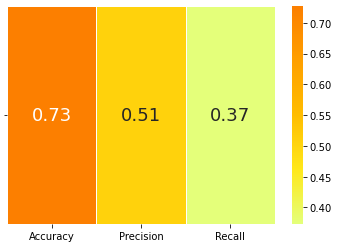

In [ ]:
sns.heatmap([[metrics.accuracy_score(Y_test, Y_pred),
              metrics.precision_score(Y_test, Y_pred),
              metrics.recall_score(Y_test, Y_pred)]],
            linewidths=0.8, xticklabels=['Accuracy', 'Precision', 'Recall'], yticklabels=[None],
            annot=True, annot_kws={'fontsize':18}, cmap='Wistia')

__7.__ Понизьте размерность данных с помощью метода главных компонент.


Нормализуем данные и понизим размерность данных до 2-х атрибутов.

In [ ]:
y = KMeans().fit_predict(X)

In [ ]:
X_new = normalize(X)

In [ ]:
X_PCA = PCA(n_components=2).fit_transform(X_new, 2)
X_PCA.shape

(1000, 2)

__8.__ Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=True)
model_low_size = RandomForestClassifier()
model_low_size.fit(X_train, Y_train)
Y_pred = model_low_size.predict(X_test)

<AxesSubplot:>

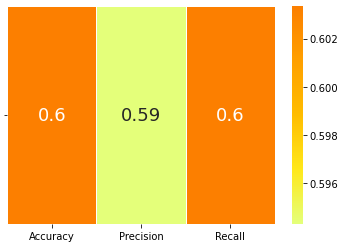

In [ ]:
sns.heatmap([[metrics.accuracy_score(Y_test, Y_pred),
              metrics.precision_score(Y_test, Y_pred, average='weighted'),
              metrics.recall_score(Y_test, Y_pred, average='weighted')]],
            linewidths=0.8, xticklabels=['Accuracy', 'Precision', 'Recall'], yticklabels=[None],
            annot=True, annot_kws={'fontsize':18}, cmap='Wistia')

__9.__ Постройте график зависимости точности модели от размерности данных.


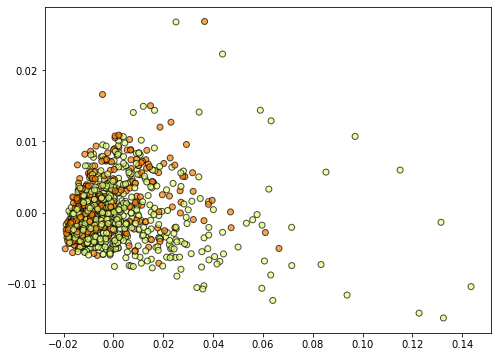

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=target, cmap='Wistia', edgecolors='black', alpha=0.7)

In [ ]:
def pca(n_components):
    X_PCA = PCA(n_components=n_components).fit_transform(X_new, 2)
    X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=True)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    results['n = ' + str(n_components)] = [metrics.accuracy_score(Y_test, Y_pred),
                                           metrics.precision_score(Y_test, Y_pred, average='weighted'),
                                           metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [ ]:
results = dict()
for n_components in range(2, credit_data.shape[1]):
    pca(n_components)

In [ ]:
methods_score = pd.DataFrame(results.values(),
                             columns = ['accuracy','precision','recall'],
                             index = results.keys())

<AxesSubplot:title={'center':'Сравнение результатов для разного количества компонент'}>

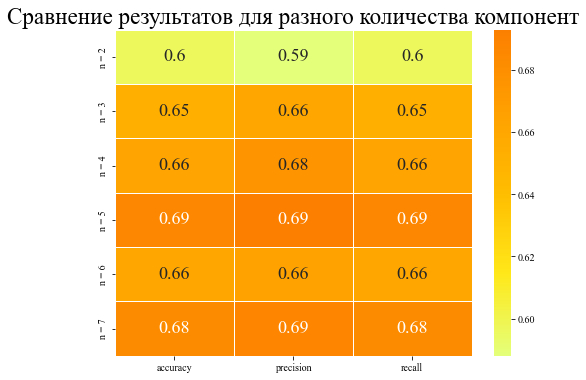

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set_style({'font.family': 'Times New Roman'})

plt.title('Сравнение результатов для разного количества компонент', fontsize = 23)

sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap='Wistia')

$$\text{Оптимальное количество компонент: }5 $$